In [1]:
require(ggplot2)
require(ggvis)
require(gridExtra)
library(tidyr)

Loading required package: ggplot2

Loading required package: ggvis

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggvis’”
Loading required package: gridExtra



In [2]:
options(jupyter.plot_mimetypes = 'image/png')

In [3]:
fake_data <- sapply(c(3, 4, 5), function (x) rnorm(10, x))

In [9]:
file <- file("../experiments/census-income/output/result.output", "r")
format <- readLines(file, n = 1)
rest <- readLines(file)

In [19]:
dims = read.csv(text = format, header = F)
dims

V1,V2,V3,V4,V5
<int>,<int>,<int>,<int>,<int>
2,2,3,2,10


In [5]:
data_matrix <- fake_data

In [23]:
data_matrix <- read.csv(text = paste0(rest), header = F, sep = " ")

In [24]:
data_matrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7914528,0.8146439,0.7979087,0.8319887,0.8013086,0.7687033,0.8154613,0.8427642,0.8268199,0.8083590
0.6238249,0.5843199,0.5444879,0.6058754,0.5514396,0.6331504,0.5853336,0.6009998,0.5745115,0.6260770
0.8976951,0.8181018,0.9083553,0.8306214,0.8632692,0.8479951,0.8994050,0.9699303,0.8707198,0.9261152
0.6770840,0.6952693,0.7898785,0.6948266,0.7325971,0.7284606,0.7247215,0.7159723,0.7278895,0.7418116
0.9131316,0.9057773,0.9430892,0.8954005,0.8663672,0.8263738,0.9594556,0.8558752,0.8312076,0.8791596
0.7670197,0.8164787,0.7659887,0.7875210,0.7156385,0.7698514,0.7240976,0.7942864,0.7908504,0.7402363
0.7403723,0.8259212,0.8603083,0.8168380,0.7723280,0.7617675,0.8148158,0.8491870,0.8675703,0.7997359
0.5449873,0.5845717,0.6206548,0.6694737,0.5838991,0.6308329,0.6118131,0.5678418,0.5960040,0.5952528
0.7523854,0.8343494,0.8434922,0.8083773,0.7518496,0.8113144,0.8073379,0.8077379,0.7861834,0.7874045


In [34]:
library("reticulate")

In [38]:
matrix(data_matrix, ncol = 10, nrow = 24)

"0.7914528, 0.6238249, 0.8976951, 0.6770840, 0.9131316, 0.7670197, 0.7403723, 0.5449873, 0.7523854, 0.5992030, 0.7546339, 0.6151503, 0.5618230, 0.5730401, 0.5359896, 0.5603812, 0.5750541, 0.5331189, 0.6184714, 0.5501056, 0.5481991, 0.5829636, 0.5770119, 0.4895474","0.8013086, 0.5514396, 0.8632692, 0.7325971, 0.8663672, 0.7156385, 0.7723280, 0.5838991, 0.7518496, 0.5981136, 0.8184588, 0.5911601, 0.5603235, 0.5433747, 0.5815968, 0.5626189, 0.5491698, 0.5824127, 0.5447878, 0.5578502, 0.5693141, 0.5422187, 0.5692728, 0.5726135","0.8268199, 0.5745115, 0.8707198, 0.7278895, 0.8312076, 0.7908504, 0.8675703, 0.5960040, 0.7861834, 0.6370502, 0.8127210, 0.5713459, 0.5728779, 0.5450249, 0.5751671, 0.5379788, 0.5963241, 0.5411351, 0.5284162, 0.5708016, 0.5503936, 0.5805535, 0.5684834, 0.5799375","0.7979087, 0.5444879, 0.9083553, 0.7898785, 0.9430892, 0.7659887, 0.8603083, 0.6206548, 0.8434922, 0.5957426, 0.8347771, 0.5877311, 0.5592651, 0.5177550, 0.5415482, 0.5912159, 0.5441281, 0.5422202, 0.5435840, 0.5493953, 0.5757368, 0.5673800, 0.6186816, 0.5466478","0.8154613, 0.5853336, 0.8994050, 0.7247215, 0.9594556, 0.7240976, 0.8148158, 0.6118131, 0.8073379, 0.5904537, 0.8092924, 0.6433735, 0.5479643, 0.5615446, 0.5955332, 0.6063247, 0.6088821, 0.5772126, 0.5621622, 0.5732447, 0.5402233, 0.5788405, 0.5573618, 0.5463943","0.7914528, 0.6238249, 0.8976951, 0.6770840, 0.9131316, 0.7670197, 0.7403723, 0.5449873, 0.7523854, 0.5992030, 0.7546339, 0.6151503, 0.5618230, 0.5730401, 0.5359896, 0.5603812, 0.5750541, 0.5331189, 0.6184714, 0.5501056, 0.5481991, 0.5829636, 0.5770119, 0.4895474","0.8013086, 0.5514396, 0.8632692, 0.7325971, 0.8663672, 0.7156385, 0.7723280, 0.5838991, 0.7518496, 0.5981136, 0.8184588, 0.5911601, 0.5603235, 0.5433747, 0.5815968, 0.5626189, 0.5491698, 0.5824127, 0.5447878, 0.5578502, 0.5693141, 0.5422187, 0.5692728, 0.5726135","0.8268199, 0.5745115, 0.8707198, 0.7278895, 0.8312076, 0.7908504, 0.8675703, 0.5960040, 0.7861834, 0.6370502, 0.8127210, 0.5713459, 0.5728779, 0.5450249, 0.5751671, 0.5379788, 0.5963241, 0.5411351, 0.5284162, 0.5708016, 0.5503936, 0.5805535, 0.5684834, 0.5799375","0.7979087, 0.5444879, 0.9083553, 0.7898785, 0.9430892, 0.7659887, 0.8603083, 0.6206548, 0.8434922, 0.5957426, 0.8347771, 0.5877311, 0.5592651, 0.5177550, 0.5415482, 0.5912159, 0.5441281, 0.5422202, 0.5435840, 0.5493953, 0.5757368, 0.5673800, 0.6186816, 0.5466478","0.8154613, 0.5853336, 0.8994050, 0.7247215, 0.9594556, 0.7240976, 0.8148158, 0.6118131, 0.8073379, 0.5904537, 0.8092924, 0.6433735, 0.5479643, 0.5615446, 0.5955332, 0.6063247, 0.6088821, 0.5772126, 0.5621622, 0.5732447, 0.5402233, 0.5788405, 0.5573618, 0.5463943"
"0.8146439, 0.5843199, 0.8181018, 0.6952693, 0.9057773, 0.8164787, 0.8259212, 0.5845717, 0.8343494, 0.6111834, 0.7504334, 0.5786465, 0.5543270, 0.6104719, 0.5471415, 0.5119656, 0.5510203, 0.5250348, 0.5510970, 0.5336254, 0.5842126, 0.5022851, 0.5173961, 0.5749760","0.7687033, 0.6331504, 0.8479951, 0.7284606, 0.8263738, 0.7698514, 0.7617675, 0.6308329, 0.8113144, 0.5781026, 0.7487930, 0.5874529, 0.5424189, 0.5351622, 0.5462224, 0.5503244, 0.5433960, 0.5503441, 0.5840376, 0.5445277, 0.5828416, 0.5321368, 0.5445581, 0.5750618","0.8083590, 0.6260770, 0.9261152, 0.7418116, 0.8791596, 0.7402363, 0.7997359, 0.5952528, 0.7874045, 0.6090917, 0.7967590, 0.5895073, 0.6111993, 0.5529029, 0.5511882, 0.5727255, 0.5981280, 0.5630283, 0.5519225, 0.5695189, 0.5382815, 0.5561002, 0.6033429, 0.5706082","0.8319887, 0.6058754, 0.8306214, 0.6948266, 0.8954005, 0.7875210, 0.8168380, 0.6694737, 0.8083773, 0.5690196, 0.8469200, 0.5850318, 0.5561208, 0.5510026, 0.5538558, 0.5588829, 0.5596693, 0.5566409, 0.5433819, 0.5721123, 0.5583916, 0.5491516, 0.5299529, 0.5537291","0.8427642, 0.6009998, 0.9699303, 0.7159723, 0.8558752, 0.7942864, 0.8491870, 0.5678418, 0.8077379, 0.6255646, 0.7505134, 0.6483973, 0.5543279, 0.5692843, 0.5674725, 0.5203103, 0.5320550, 0.5910369, 0.5711390, 0.5880649, 0.5488187, 0.5508834, 0.5216586, 0.5464536","0.8146439, 0.5843199, 0.

In [39]:
array_reshape(matrix(data_matrix, ncol = 10, nrow = 24), c(2, 2, 3, 2, 10), order = "C")

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): Matrix type cannot be converted to python (only integer, numeric, complex, logical, and character matrixes can be converted


In [30]:
array(sapply(c(2, 2, 3, 2, 10), function(i) data_matrix[(i-4):i,]), dim = c(2, 2, 3, 2, 10))

ERROR: Error in xj[i]: only 0's may be mixed with negative subscripts


In [7]:
data <- data.frame(data_matrix)
colnames(data) <- c("Simplest version", "With random layer", "Extra layer made trainable")
data["model_id"] <- rownames(data)

In [8]:
data_stacked <- gather(data, "model_version", "score", colnames(data)[1:3])

In [9]:
active_theme <- theme(
    legend.position = "none"
)

In [10]:
p1 <- ggplot(data = data_stacked, aes(x = model_version, y = score, group = model_id)) +
    ggtitle("Scores for convolutional task") + theme(
        plot.title = element_text(hjust = .5, size = 20)
    ) +
    active_theme +
    coord_trans(limy = c(0, 13)) +
    geom_line(size=1)

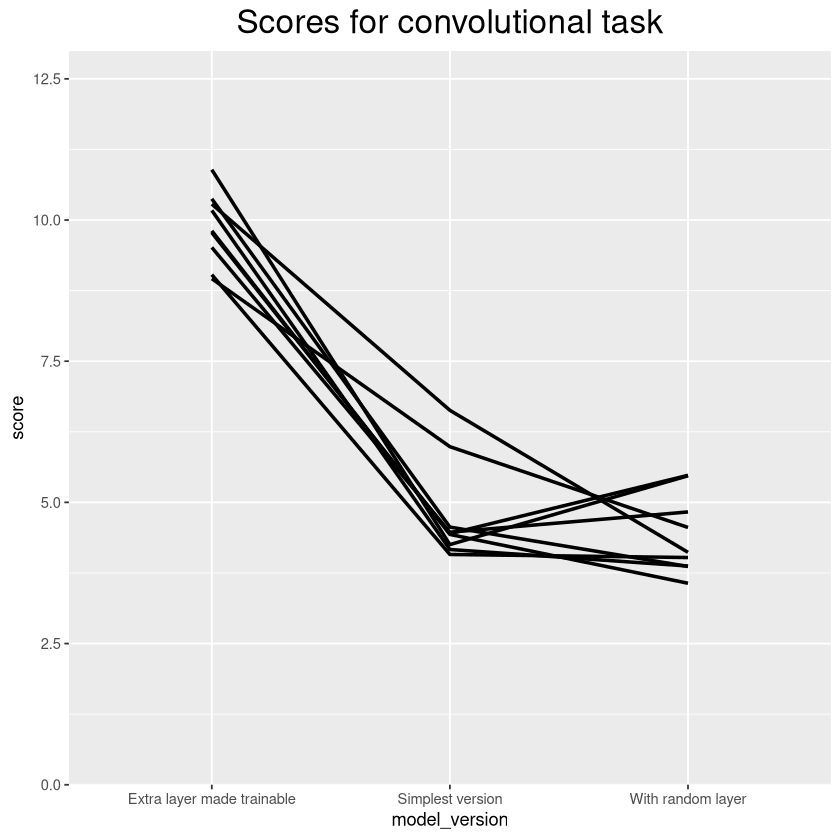

In [11]:
p1